# Wind Power Generation Forecasting

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [4]:
location1.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606
43799,2021-12-31 23:00:00,35.0,97,34.2,2.26,5.04,45,51,4.3,0.2877


In [5]:
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [6]:
location1.head(10)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
5,2017-01-02 05:00:00,27.6,90,25.2,2.73,5.59,66,80,4.5,0.0778
6,2017-01-02 06:00:00,26.7,92,24.9,2.10,5.82,65,78,4.7,0.0959
7,2017-01-02 07:00:00,28.4,91,26.1,3.10,6.24,69,78,4.8,0.1141
8,2017-01-02 08:00:00,30.2,88,27.0,3.54,6.89,74,81,5.8,0.1322
9,2017-01-02 09:00:00,34.0,82,29.1,3.44,6.01,82,86,6.5,0.1503


In [7]:
location2.tail(10)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43790,2021-12-31 14:00:00,-14.4,71,-21.0,4.53,6.16,317,318,7.9,0.3054
43791,2021-12-31 15:00:00,-14.6,71,-21.3,4.39,6.22,313,314,7.5,0.2896
43792,2021-12-31 16:00:00,-15.4,73,-21.6,4.53,7.93,315,318,7.8,0.2738
43793,2021-12-31 17:00:00,-16.4,71,-22.9,4.50,8.08,323,324,7.9,0.2579
43794,2021-12-31 18:00:00,-17.0,71,-23.5,4.96,8.58,304,306,7.2,0.2510
43795,2021-12-31 19:00:00,-17.9,72,-24.2,6.16,10.62,317,317,9.6,0.2530
43796,2021-12-31 20:00:00,-18.4,72,-24.7,5.87,10.26,313,317,10.3,0.2549
43797,2021-12-31 21:00:00,-18.5,71,-25.1,6.30,10.82,312,315,9.9,0.2569
43798,2021-12-31 22:00:00,-18.7,71,-25.1,5.44,9.63,306,312,9.9,0.2589
43799,2021-12-31 23:00:00,-18.3,71,-24.9,5.52,9.64,302,307,8.9,0.2609


In [8]:
location3.head(10
        )

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,29.7,55,15.4,4.96,8.46,124,129,8.8,0.3438
1,2017-01-02 01:00:00,29.6,56,15.6,4.97,8.43,120,124,8.5,0.3954
2,2017-01-02 02:00:00,29.8,56,16.1,5.69,9.18,121,123,9.7,0.4471
3,2017-01-02 03:00:00,29.8,58,16.8,5.49,8.88,123,126,9.9,0.4988
4,2017-01-02 04:00:00,30.2,59,17.8,5.19,8.36,124,127,9.4,0.5504
5,2017-01-02 05:00:00,30.1,68,20.9,4.75,7.55,120,125,8.9,0.5731
6,2017-01-02 06:00:00,30.8,72,22.8,4.59,7.78,110,116,8.1,0.5668
7,2017-01-02 07:00:00,31.3,74,23.8,4.37,7.11,110,116,7.7,0.5605
8,2017-01-02 08:00:00,31.3,79,25.6,3.86,6.35,111,116,7.5,0.5542
9,2017-01-02 09:00:00,31.2,87,27.9,3.61,6.11,104,111,6.4,0.5479


In [9]:
location4.tail(10)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43790,2021-12-31 14:00:00,29.5,86,25.8,2.63,3.61,81,85,5.1,0.1506
43791,2021-12-31 15:00:00,30.0,86,26.3,2.69,3.98,48,51,4.9,0.2084
43792,2021-12-31 16:00:00,29.4,87,26.1,3.20,5.57,14,21,5.2,0.2662
43793,2021-12-31 17:00:00,28.4,89,25.7,4.62,7.51,5,10,7.7,0.3240
43794,2021-12-31 18:00:00,26.2,92,24.2,4.71,7.69,12,16,8.8,0.3492
43795,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417
43796,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342
43797,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267
43798,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192
43799,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117


In [10]:
location4.head(10)

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922
5,2017-01-02 05:00:00,22.8,90,20.4,3.59,8.12,77,86,6.5,0.4900
6,2017-01-02 06:00:00,23.8,91,21.4,3.73,8.00,82,90,6.8,0.4386
7,2017-01-02 07:00:00,26.8,91,24.5,4.01,7.91,86,92,6.8,0.3872
8,2017-01-02 08:00:00,28.5,90,26.0,3.81,7.31,87,93,6.9,0.3358
9,2017-01-02 09:00:00,29.8,91,27.4,4.04,7.30,81,89,6.9,0.2844


In [11]:
location1['Location']='Location1'
location2['Location']='Location2'

location3['Location']='Location3'
location4['Location']='Location4'

merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,Location4
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,Location4
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,Location4
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,Location4
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,Location4


In [12]:
merged_data.to_csv('merged_locations.csv', index=False)

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [14]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [16]:
merged_data.to_csv('merged_locations.csv', index=False)

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [18]:
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [19]:
merged_data.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
175195,2021-12-31 19:00:00,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,Location4
175196,2021-12-31 20:00:00,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,Location4
175197,2021-12-31 21:00:00,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,Location4
175198,2021-12-31 22:00:00,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,Location4
175199,2021-12-31 23:00:00,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,Location4


In [20]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [21]:
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [22]:
merged_data.duplicated().sum()

np.int64(0)

In [23]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [24]:
dummy_cols = [col for col in merged_data.columns if col.startswith('Location_')]
merged_data[dummy_cols] = merged_data[dummy_cols].astype(int)


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location_Location2   175200 non-null  int64  
 11  Location_Location3   175200 non-null  int64  
 12  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 17.4+ MB


In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location_Location2   175200 non-null  int64  
 11  Location_Location3   175200 non-null  int64  
 12  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 17.4+ MB


In [27]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [28]:
merged_data.drop('Time', axis=1, inplace=True)

In [29]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [30]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


In [31]:
merged_data.tail()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
175195,25.5,94,24.0,4.01,6.66,4,8,8.2,0.3417,0,0,1
175196,25.3,92,23.2,4.70,7.52,1,5,7.9,0.3342,0,0,1
175197,24.9,90,22.5,4.61,7.57,4,8,7.9,0.3267,0,0,1
175198,24.9,89,22.1,4.60,7.44,2,6,7.8,0.3192,0,0,1
175199,24.9,88,21.8,4.65,7.77,9,12,7.8,0.3117,0,0,1


### WEEK 2: Exploratory Data Analysis

In [32]:
# lets get only numerical colums 
numerical_columns=merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Location_Location2', 'Location_Location3',
       'Location_Location4'],
      dtype='object')

In [33]:
merged_data.shape

(175200, 12)

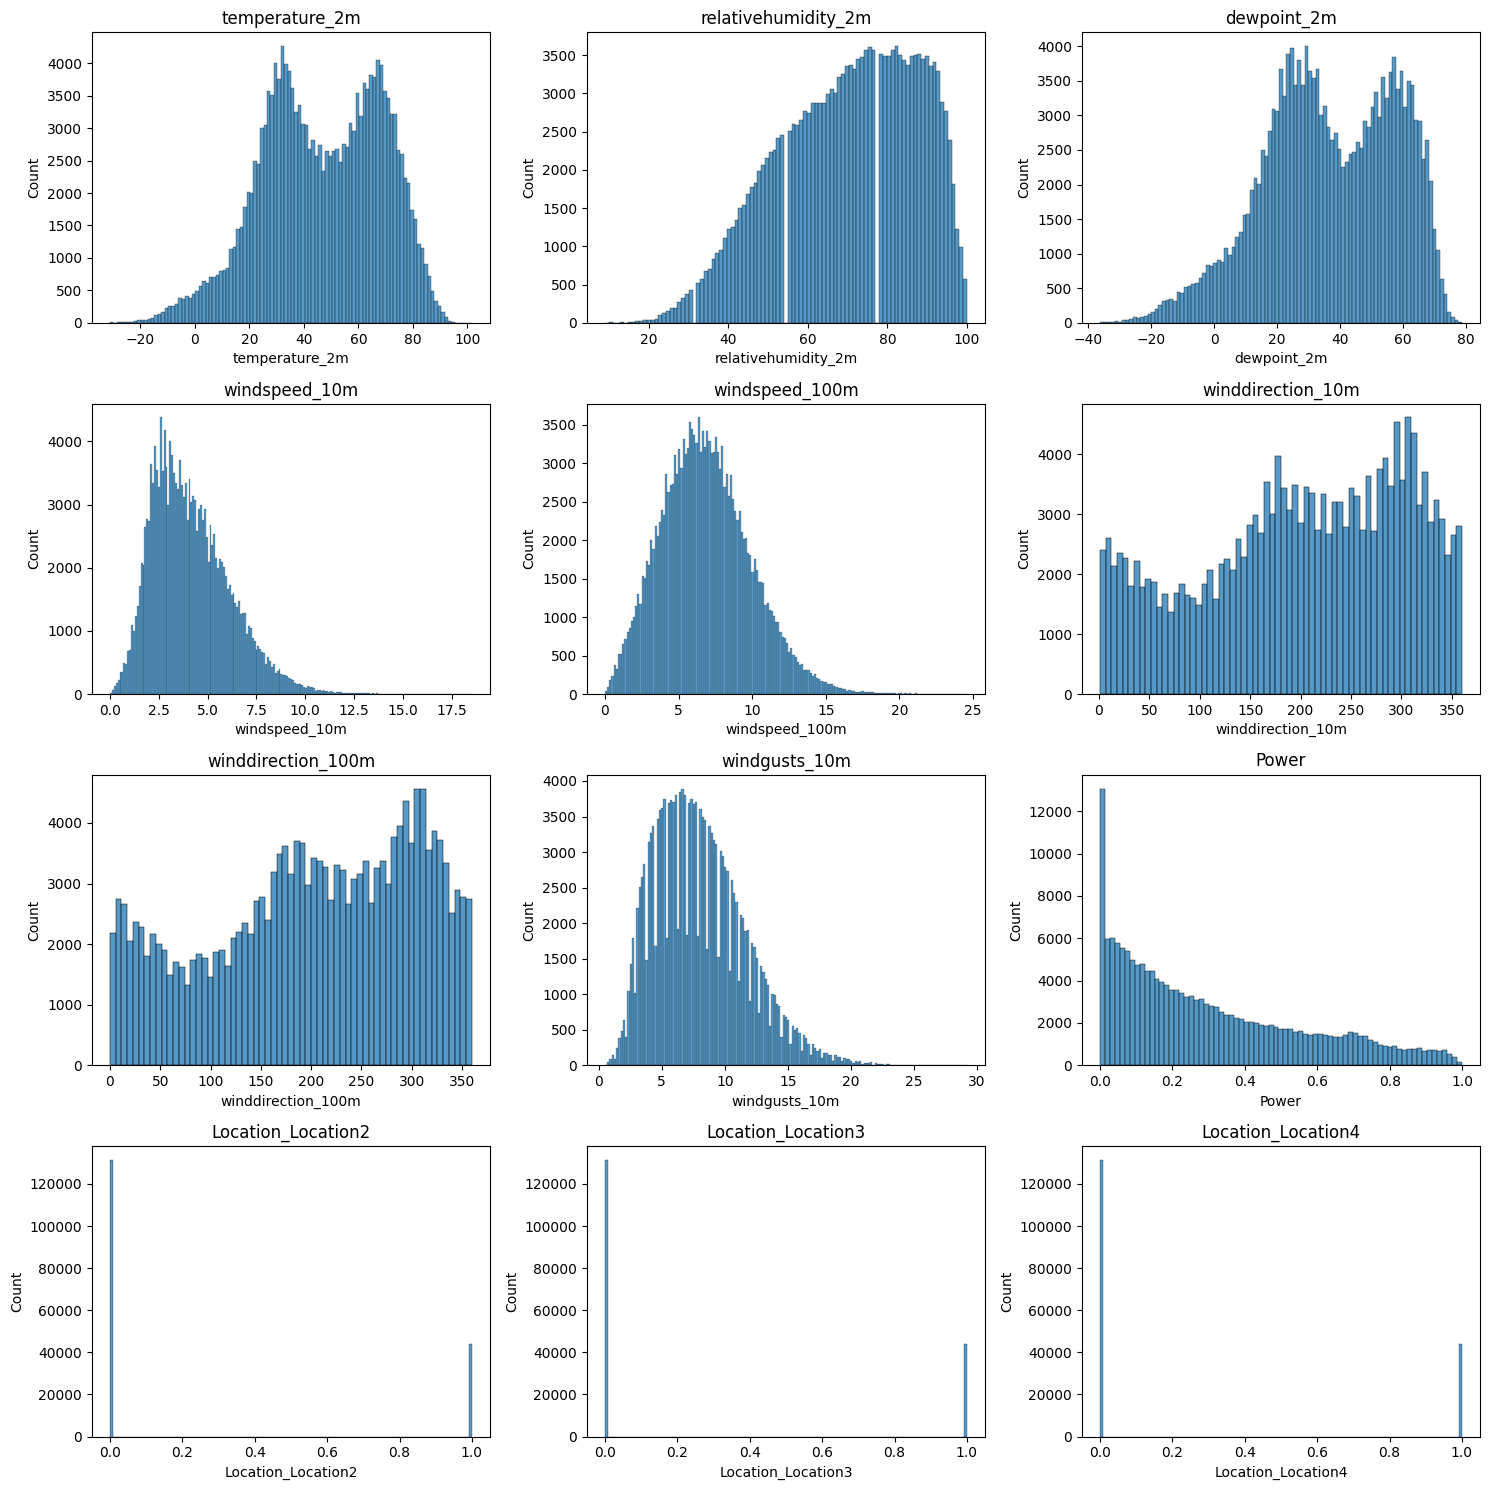

In [34]:
# lets dive into EDA by plotting graphs
#lets plot using subplots for distruibuton of data of all numerical columns 
fig, axes =plt.subplots(4,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.histplot(merged_data[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [35]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location_Location2   175200 non-null  int64  
 10  Location_Location3   175200 non-null  int64  
 11  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 16.0 MB


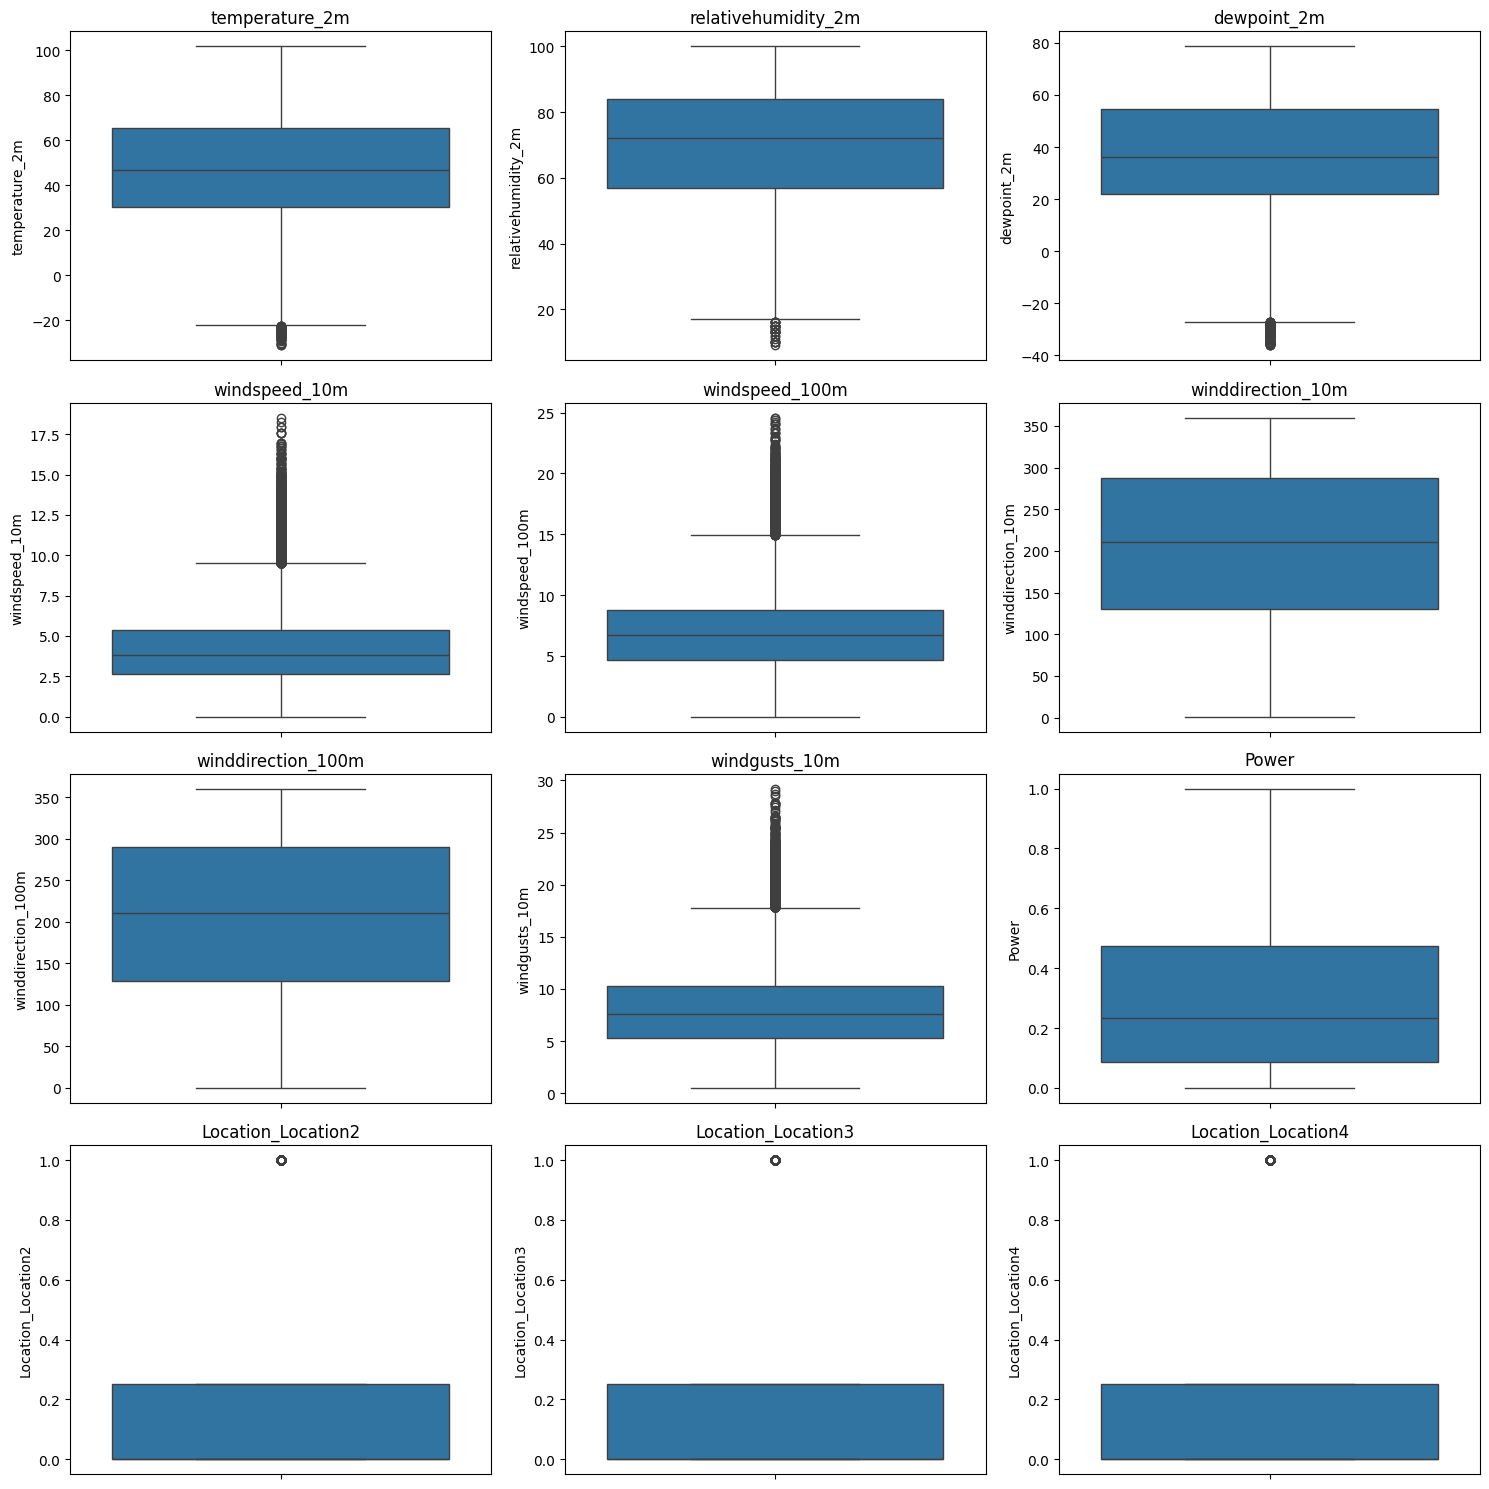

In [36]:
#lets create a box plot for the same data 
fig,axes=plt.subplots(4,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col],ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

    

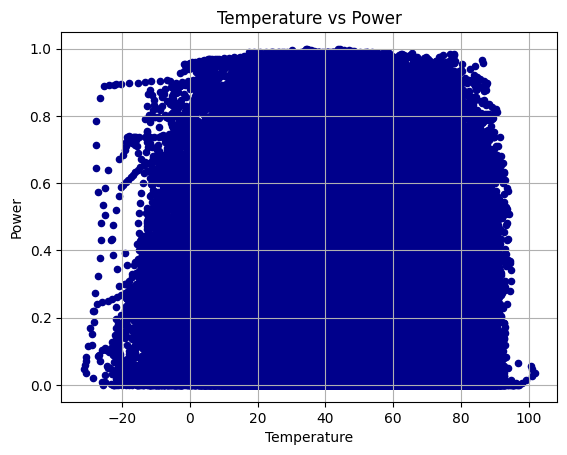

In [37]:
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


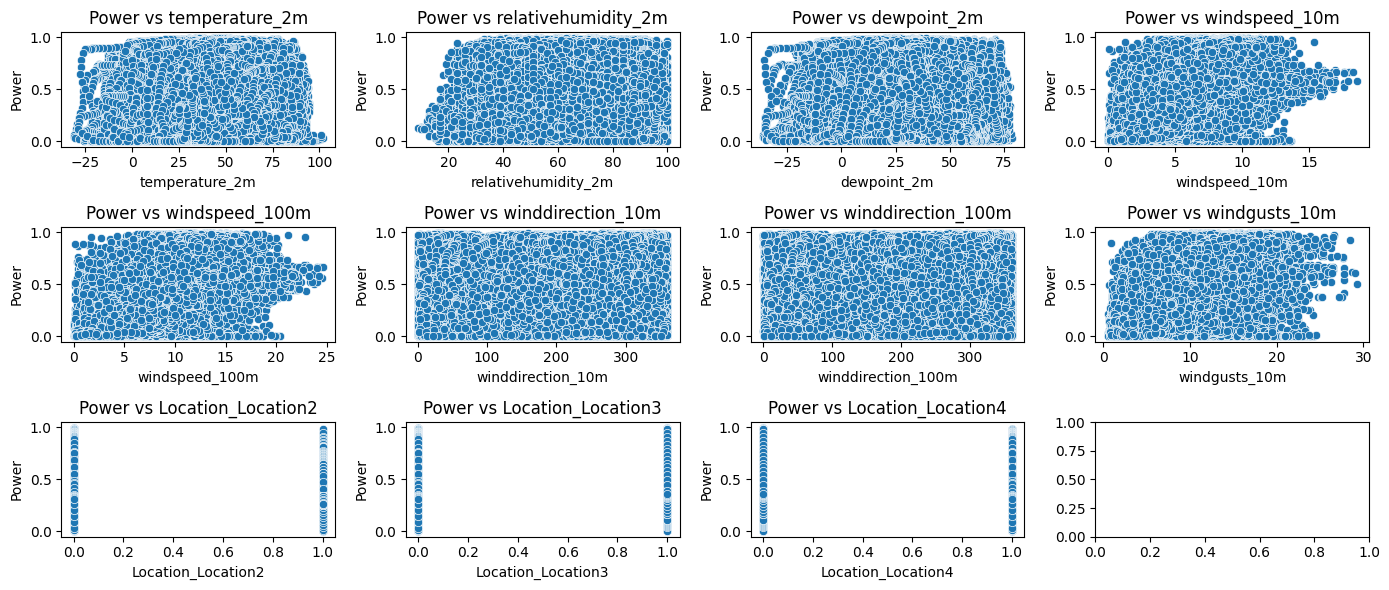

In [38]:
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()


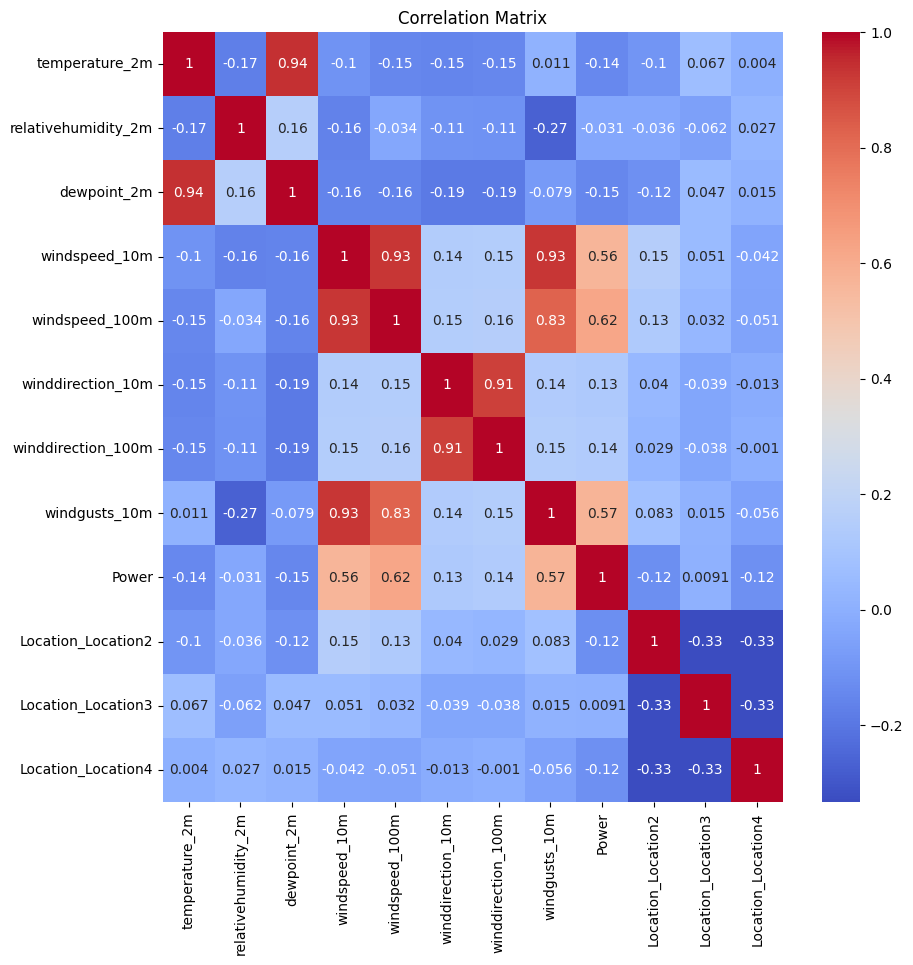

In [39]:
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [40]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location_Location2   175200 non-null  int64  
 10  Location_Location3   175200 non-null  int64  
 11  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 16.0 MB


In [41]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


**Week 3: Data modeling and evaluate**

In [42]:
X=merged_data.drop('Power',axis=1)
y=merged_data['Power']
# here basically we are seperating out features and target 
# features are independent and power is what we need to predict as y(convention)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.1376585805337513
Mean Squared Error: 0.03254230698731513
R Squared Score: 0.5127994646410983


In [47]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10662940119863015
RF MSE: 0.02155910436314834
RF R2 Score: 0.6772322505691262


In [49]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [50]:
# Train using XGBoost Regressor Model
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [51]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:

# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.11572619130940615
XGB MSE: 0.024946639423317377
XGB R2: 0.6265164578779464


In [53]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MAE: 0.11371959838082517
Tuned Model Mean Absolute Error (MAE): 0.11317648126491296
Tuned Model Mean Squared Error (MSE): 0.023806110547110557
Tuned Model R^2 Score: 0.6435916541538849


In [55]:
!pip install lightgbm
    

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00


In [56]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lgb_model = LGBMRegressor(
    num_leaves=31,
    max_depth=-1,  # No limit
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'LightGBM MAE: {mae_lgb}')
print(f'LightGBM MSE: {mse_lgb}')
print(f'LightGBM R2 Score: {r2_lgb}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1872
[LightGBM] [Info] Number of data points in the train set: 140160, number of used features: 11
[LightGBM] [Info] Start training from score 0.303389
LightGBM MAE: 0.11788439075983408
LightGBM MSE: 0.025408678870137664
LightGBM R2 Score: 0.6195991282019797


C:\Users\gujju\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [57]:
# as we got r2 score of lightgbm is less than xgboost lets try catBoost algo

In [60]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the CatBoost model
cat_model = CatBoostRegressor(
    iterations=300,             # like n_estimators
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    verbose=0,                  # set to 100 to see training log every 100 iterations
    random_state=42
)

# Fit the model
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

print(f'CatBoost MAE: {mae_cat}')
print(f'CatBoost MSE: {mse_cat}')
print(f'CatBoost R2 Score: {r2_cat}')


CatBoost MAE: 0.11756232157125764
CatBoost MSE: 0.025427800197837785
CatBoost R2 Score: 0.6193128571304203
